# Machine Learning Workshop - Binus

Data is gathered from 

https://www.kaggle.com/harlfoxem/housesalesprediction


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

Variable Explaination

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms.
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - Living room area in 2015(implies– some renovations). This might or might not have affected the lotsize area
- sqft_lot15 - lotSize area in 2015(implies– some renovations)

## Load data

In [0]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/afif2100/ds-workshop/master/kc_house_data.csv"
                 ,index_col="id")
df = df.drop(["date","lat","long","zipcode"],axis=1)
df = df.reset_index(drop=True)
display(df.head(3).T)

,0,1,2
price,221900.0,538000.00,180000.0
bedrooms,3.0,3.00,2.0
bathrooms,1.0,2.25,1.0
sqft_living,1180.0,2570.00,770.0
sqft_lot,5650.0,7242.00,10000.0
floors,1.0,2.00,1.0
waterfront,0.0,0.00,0.0
view,0.0,0.00,0.0
condition,3.0,3.00,3.0
grade,7.0,7.00,6.0


## Simple EDA

In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


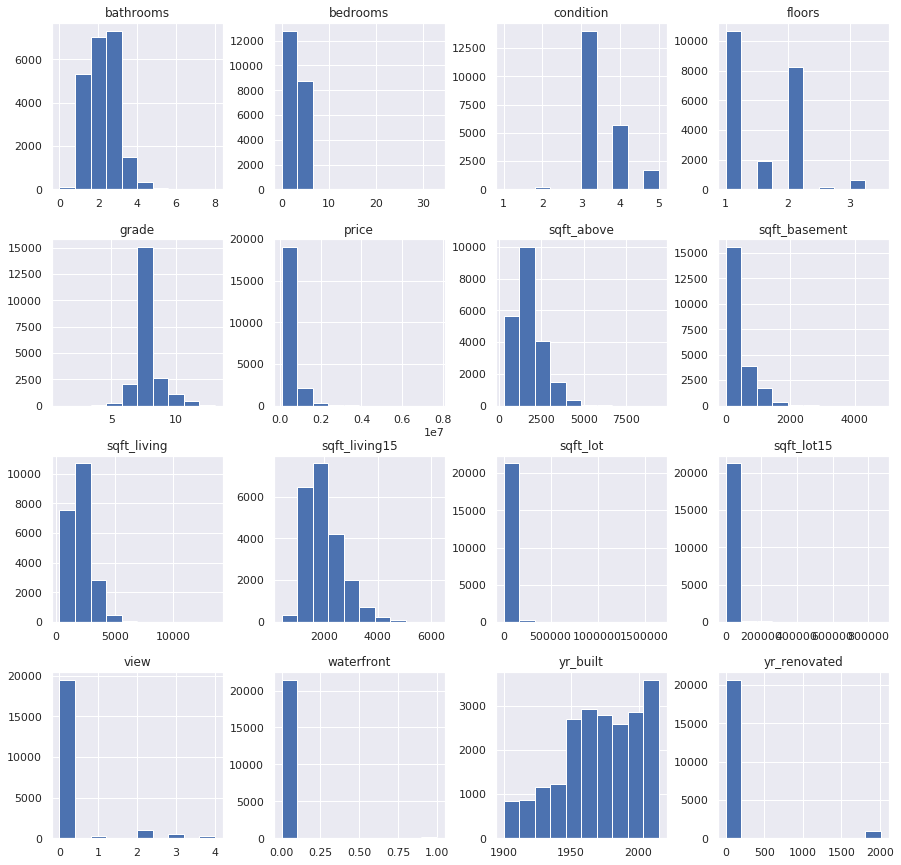

In [5]:
p = df.hist(figsize = (15,15))

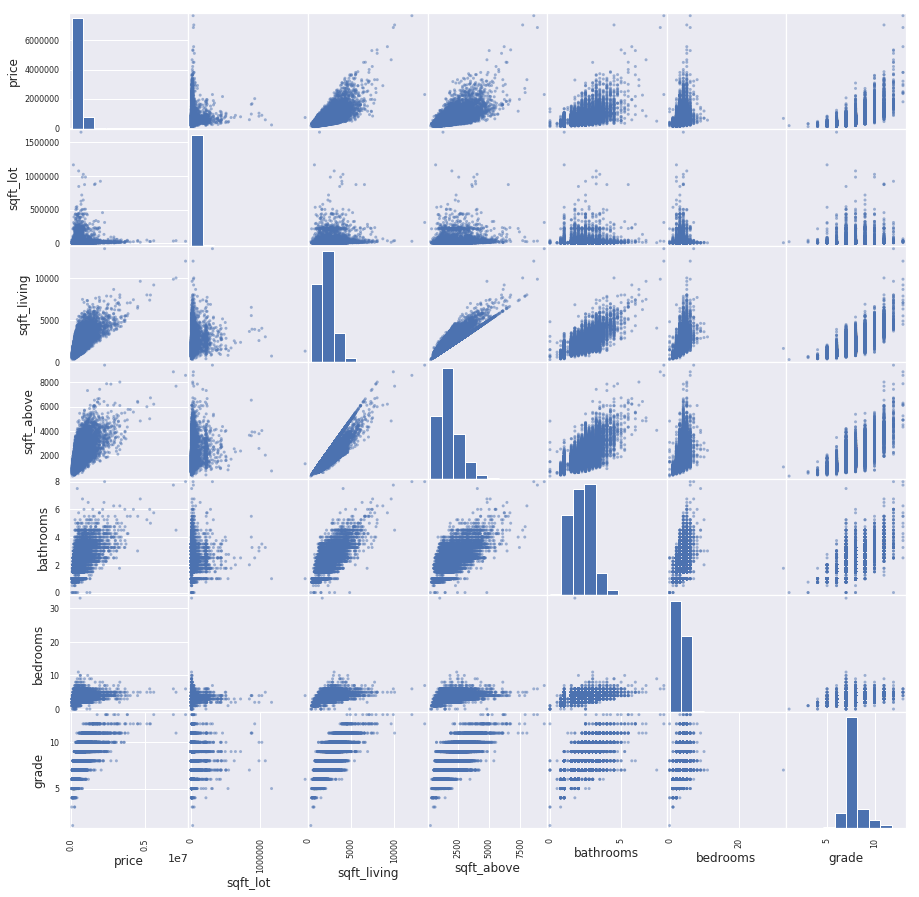

In [6]:
from pandas.plotting import scatter_matrix
feat=["price","sqft_lot","sqft_living","sqft_above","bathrooms","bedrooms","grade"]
p=scatter_matrix(df[feat],figsize=(15, 15))

From plot above we can se some variabels have not normaly distributed

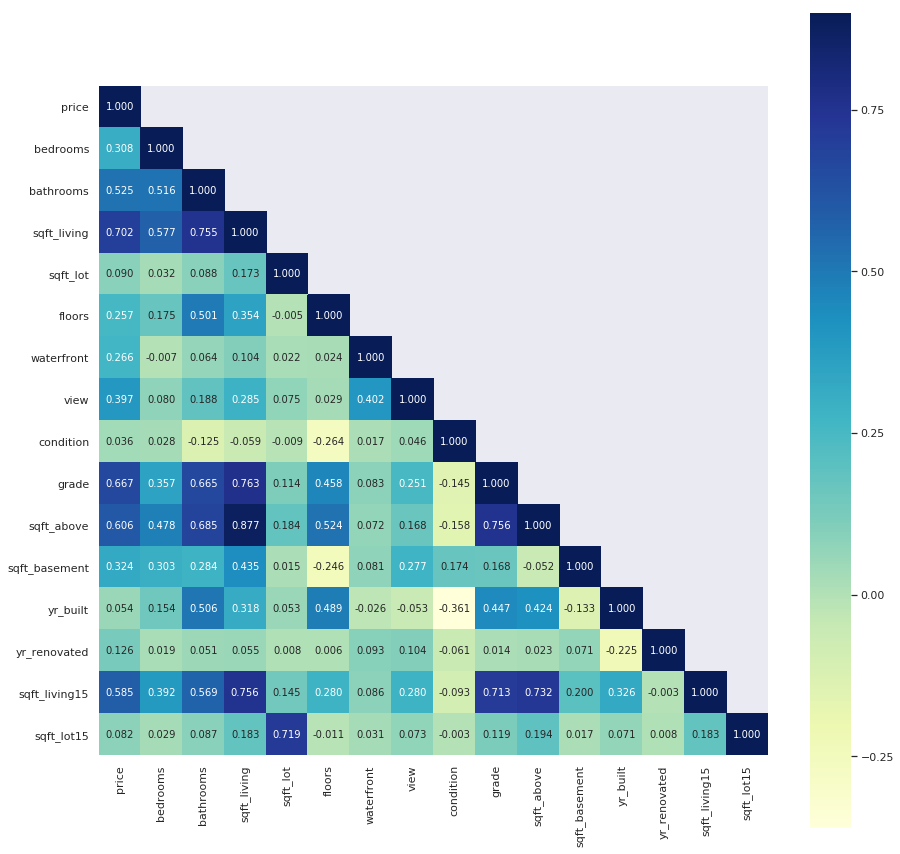

In [7]:
columns  = df.columns 
corrMatt = df[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatt, mask=mask,vmax=0.9, square=True,annot=True, fmt = ".3f",cmap="YlGnBu")

you can see on correlation plot above that price is higly correlated with a,b,c,d

# Data Normalization

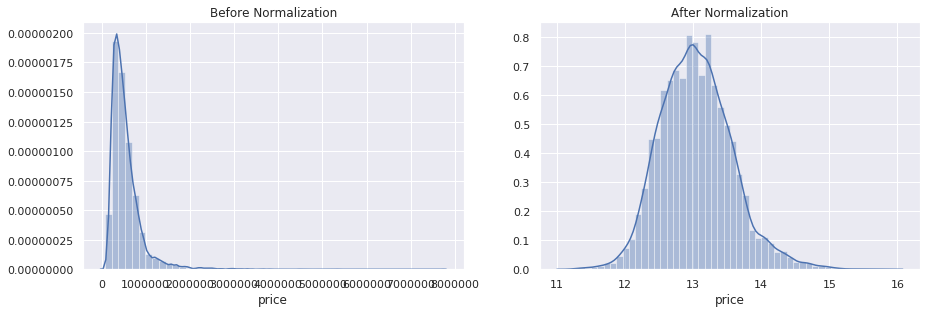

In [8]:
#Check the new distribution 
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title('Before Normalization')
sns.distplot(df.price)

#Check the new distribution
plt.subplot(2, 2, 2)
plt.title('After Normalization')
sns.distplot(np.log(df.price))

In [0]:
x = space = df['sqft_living']
y = price = df['price']

x = np.array(x).reshape(-1, 1)
y = np.array(y)

x_log = np.log(x)
y_log = np.log(y)

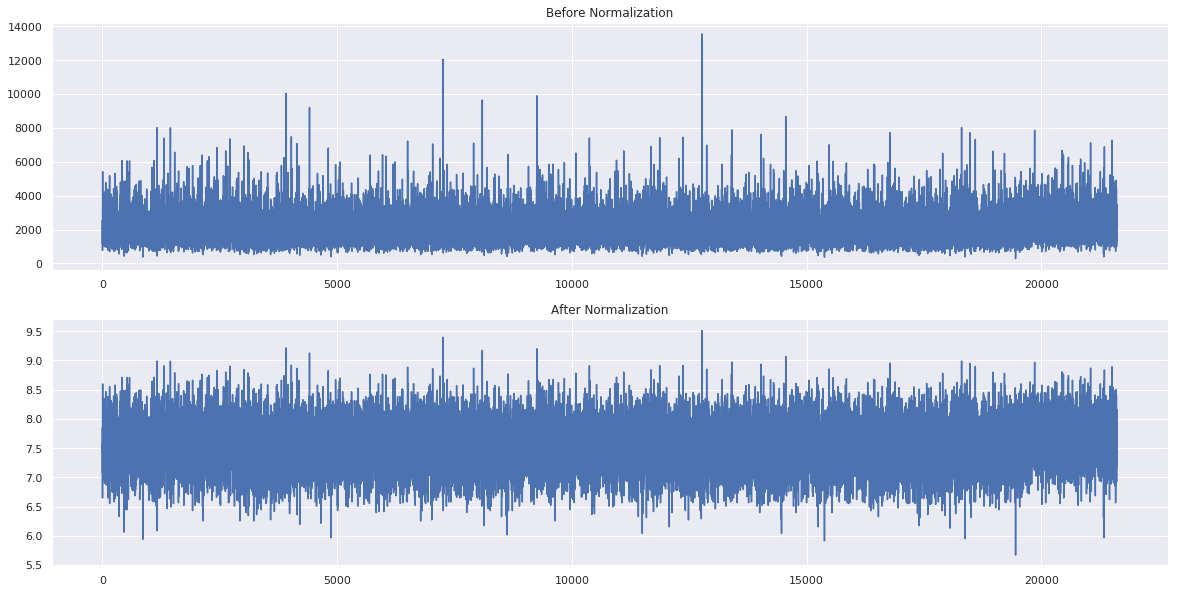

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.title('Before Normalization')
plt.plot(x)

plt.subplot(2, 1, 2)
plt.title('After Normalization')
plt.plot(x_log)

plt.show()

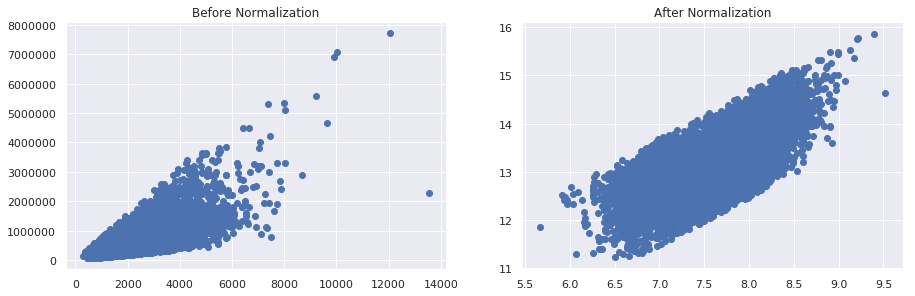

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title('Before Normalization')
plt.scatter(x,y)

plt.subplot(2, 2, 2)
plt.title('After Normalization')
plt.scatter(x_log,y_log)

plt.show()

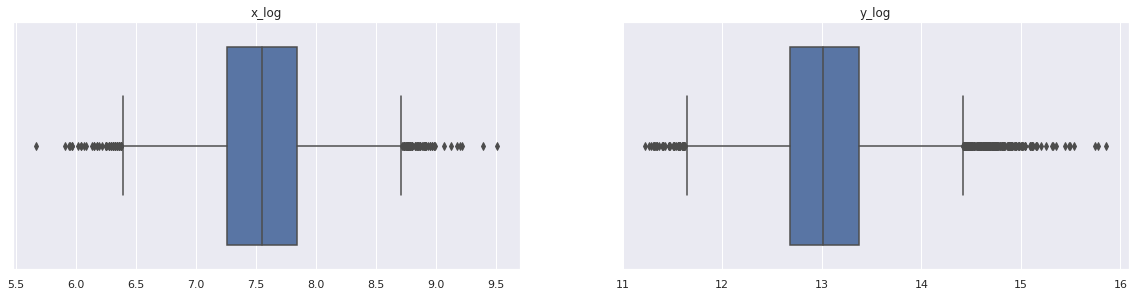

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.title('x_log')
sns.boxplot(x_log)

plt.subplot(2, 2, 2)
plt.title('y_log')
sns.boxplot(y_log)

plt.show()

In [13]:
log_df = np.log(df[["price","sqft_living"]])
log_df.head(5)

,price,sqft_living
0,12.309982,7.073270
1,13.195614,7.851661
2,12.100712,6.646391
3,13.311329,7.580700
4,13.142166,7.426549


In [14]:
## removing outlier
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_df.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_df.loc[:, feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_df.loc[:, feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print(("Data points considered outliers for the feature '{}':".format(feature)))

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_df.loc[~((log_df[feature] >= Q1 - step) & (log_df[feature] <= Q3 + step)), :]
#     display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))
clean_data = log_df.drop(outliers,axis=0).reset_index(drop=True)

Data points considered outliers for the feature 'price':
Data points considered outliers for the feature 'sqft_living':


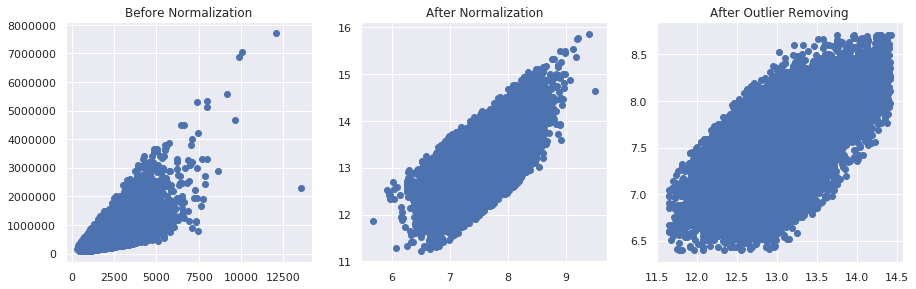

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(3, 3, 1)
plt.title('Before Normalization')
plt.scatter(x,y)

plt.subplot(3, 3, 2)
plt.title('After Normalization')
plt.scatter(x_log,y_log)

plt.subplot(3, 3, 3)
plt.title('After Outlier Removing')
plt.scatter(clean_data["price"]
            ,clean_data["sqft_living"])

plt.show()

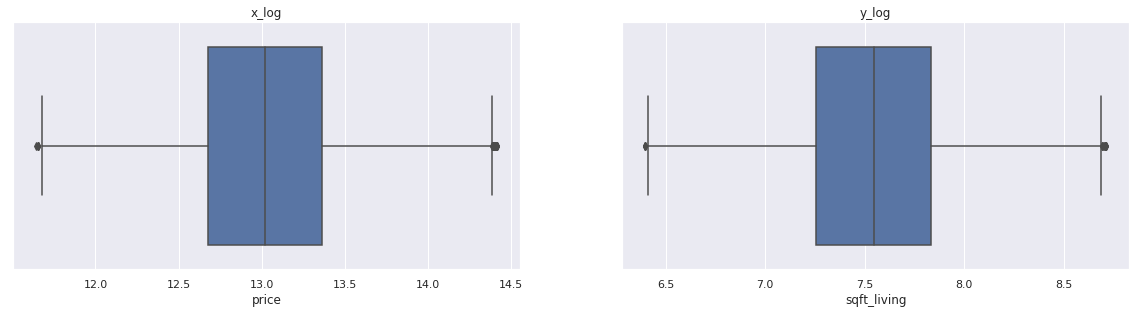

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.title('x_log')
sns.boxplot(clean_data["price"])

plt.subplot(2, 2, 2)
plt.title('y_log')
sns.boxplot(clean_data["sqft_living"])

plt.show()

# Linear Regression

## Split Train test

In [0]:
X = clean_data["sqft_living"]
y = clean_data["price"]

X = np.array(X).reshape(-1, 1)
y = np.array(y)

In [0]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=123)

## Fit the model 

In [19]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#regression function
b0 = model.intercept_
b1 = model.coef_[0]
print("Value of b0 = {} and b1 = {}".format(b0,b1))

Value of b0 = 7.2038409782745 and b1 = 0.7722317467736255


In [21]:
#Predicting the prices of test data
pred = model.predict(X_test)
pred

array([13.4648798 , 13.57523174, 13.26413235, ..., 12.96595657,
       13.00490088, 12.89633903])

In [22]:
#Mengukur tingkat error dengan data test
# menggunakan sse
error = y_test-pred
se = sum(error)
sse = se**2

# menggunakan mape
ape = abs(error / y_test)
mape = np.mean(ape)

print("Value MAPE = {} ,SE = {}, SSE= {}".format(mape,se,sse))

Value MAPE = 0.02354598102816416 ,SE = 37.760942312947705, SSE= 1425.8887643617643


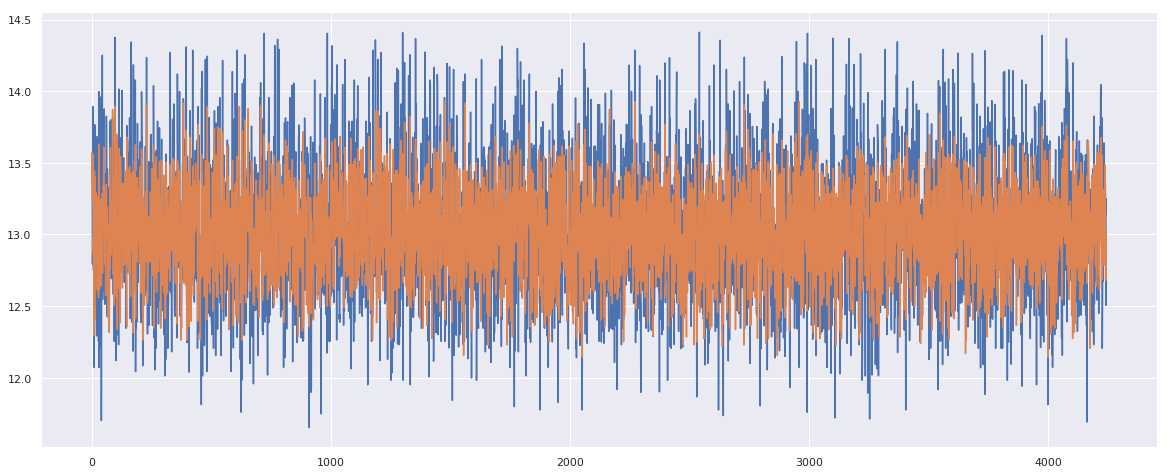

In [23]:
plt.subplots(figsize=(20,8))
plt.plot(np.array(y_test))
plt.plot(pred)
plt.show()

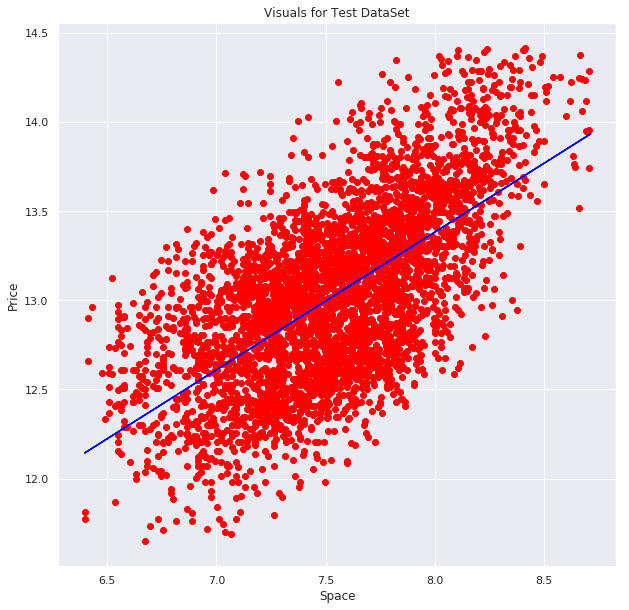

In [24]:
#Visualizing the Test Results 
plt.subplots(figsize=(10,10))
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [25]:
df.sample(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
10886,390000.0,3,2.5,2250,8076,2.0,0,0,3,8,2250,0,1995,0,2180,7244


In [26]:
hasil = model.predict([[np.log(1580)]])
print(hasil)
hasil_ = np.exp(hasil)
print(hasil_)
# np.exp(model.predict([[np.log(1580)]]))

[12.89146689]
[396910.81707066]


# Multinomial linear regresion

In [35]:
display(df.describe().T)
display(df.columns)

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [0]:
x = df[["bathrooms","bedrooms","sqft_lot","sqft_living","sqft_above","grade"]]
y = df["price"]

In [0]:
x["sqft_lot"]= np.log(x["sqft_lot"])
x["sqft_living"]= np.log(x["sqft_living"])
x["sqft_above"]= np.log(x["sqft_above"])
x["sqft_above"]= np.log(x["sqft_above"])

y = np.log(y)

In [0]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [40]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting the prices
pred = model.predict(X_test)

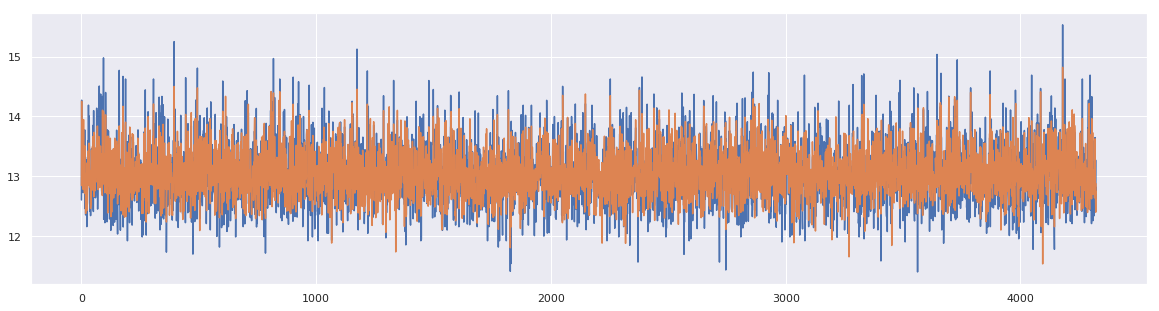

In [42]:
plt.subplots(figsize=(20,5))
plt.plot(np.array(y_test))
plt.plot(pred)
plt.show()

In [43]:
#Mengukur tingkat error dengan data test
# menggunakan sse
error = y_test-pred
se = sum(error)
sse = se**2

# menggunakan mape
ape = abs(error / y_test)
mape = np.mean(ape)

print("Value MAPE = {} and SSE= {}".format(mape,sse))

Value MAPE = 0.021147228393995077 and SSE= 3251.1927715981133


In [0]:
from sklearn.metrics import mean_squared_error as mse

In [46]:
mse(y_test,pred)

0.11726350867879388

# Model Eveluation